In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 23: Hypothesis Testing, Continued

Recall in Lesson 22, we covered hypothesis testing. The structure of a hypothesis test is largely similar regardless of the context of the problem. We state the hypotheses, decide on a test statistic, calculate the $p$-value and reach a conclusion. To calculate a $p$-value, we need to find the distribution of the test statistic under the null hypothesis. 

### Example 1: The Lady Tasting Tea

The "lady tasting tea" problem is a now famous story during which, at a gathering one summer afternoon in Cambridge, some friends drank tea with milk. Among them, a woman claimed to be able to tell, based on taste, whether the milk or the tea was added first to the cup. A now famous statistician, Ronald Fisher, was at the gathering, and he studied the claim. The woman was offered 8 cups of tea mixed with milk (4 with milk added first and 4 with tea added first) and she successfully identified 6 (3 of each). What can we say about her ability to discriminate the teas? 

*Clarification: the woman knew there would be 4 of each tea*

Step 1: *The null hypothesis states that the woman could have successfully identified 6 cups of tea by choosing at random; the alternate hypothesis states that identifying at random would not have identified 6 cups correctly.*

**Better: Null hypothesis states that she cannot predict with any consistency beyond randomness, while the alternate hypothesis states that she can predict more consistently than randomness.**

Step 2: *Our test statistic will be the number of cups successfully identified--this statistic would be large under the null hypothesis.*

**Better: X is the number of times she correctly picked tea first**

$X_{Obs}= 3$

Step 3: *Step 3 is to determine the distribution of the test statistic under the null hypothesis and the p-value of the observed value.*

*$X\text{~Hypergeom}(M=8, n=4, N=4)$ because of the 8 tea cups, there are 4 possible successes and the woman will pick 3 without replacement.*

In [2]:
M,n,N=8,4,4
#stats.hypergeom.rvs(M,n,N,size=20)
stats.hypergeom.pmf([3,4],M,n,N,).sum() # Sum of probabilities of guessing 3 or 4 at random
1-stats.hypergeom.cdf(2,M,n,N) # Probability of not guessing 2 or less at random

0.24285714285714263

0.24285714285714288

Step 4: *With a p-value of 0.24 > 0.05, the observed statistic does not support the alternate hypothesis.*

### Example 2: iris dataset

The `iris` dataset is common in introductory statistics. It shows various characteristics of three different species of irises. Let's determine whether the virginica species has a larger mean sepal width than that of versicolor. 

*Clarification: irises are flowers*

In [3]:
iris=Table().read_table("Data/iris.csv")
iris
iris.group(4,np.mean)

sepal_length,sepal_width,petal_length,petal_width,species
5.1,3.5,1.4,0.2,setosa
4.9,3,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


species,sepal_length mean,sepal_width mean,petal_length mean,petal_width mean
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.77,4.26,1.326
virginica,6.588,2.974,5.552,2.026


Step 1: *The null hypothesis states that the mean sepal width is equal between the species; the alternate hypothesis states that virginica has a larger mean sepal width than versicolor.*

In [4]:
iris_sub=iris.select(4,1).where(0,are.not_containing('setosa'))
obs=np.diff(iris_sub.group(0,np.mean).column(1))[0]
obs

0.20399999999999974

Step 2: *The test statistic is the difference in sample means between the sepal widths of versicolor and virginica, specifically the width of virginica minus the width of versicolor.*

*The observed absolute difference is 0.204.*

Step 3: *If the null hypothesis were true, then the difference should be distributed around 0. How far is 0.204 compared to the distribution? We find this with a permutation test.*

*If the null hypothesis were true, then the sepal widths came from the same population with the same mean value: the species wouldn't matter. So we assign the sepal widths to a species at random to see an alternate sample under the null hypothesis.*

In [5]:
diffs = make_array([])
for i in np.arange(10000):
    shuffledData = iris_sub.sample(with_replacement=False).column(1) # get shuffled widths in an array
    sample = iris_sub.with_column('Shuffled Widths', shuffledData).group(0,np.mean).column(2) # add array to table & group by species, averaging widths
    diffs = np.append(diffs, np.diff(sample)[0]) # get difference between two species and record

p = sum(diffs>=obs)/len(diffs)
print('The p-value of the observed statistic is ' + str(p) + '.')

The p-value of the observed statistic is 0.0008.


Step 4: *Since the p-value of the observed statistic is very small, much less than 0.05, we conclude that the data does not support the null hypothesis.*

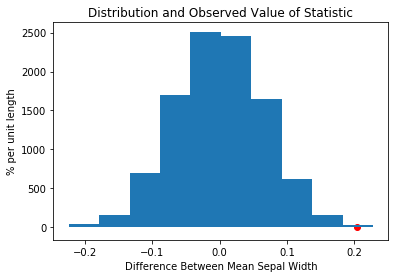

In [6]:
plt.hist(diffs);
plt.scatter(obs,0, c='r');
plt.xlabel('Difference Between Mean Sepal Width');
plt.ylabel('% per unit length');
plt.title('Distribution and Observed Value of Statistic');